### <b> Eclat - Association Rules - Author of algorithm: Zaki</b>

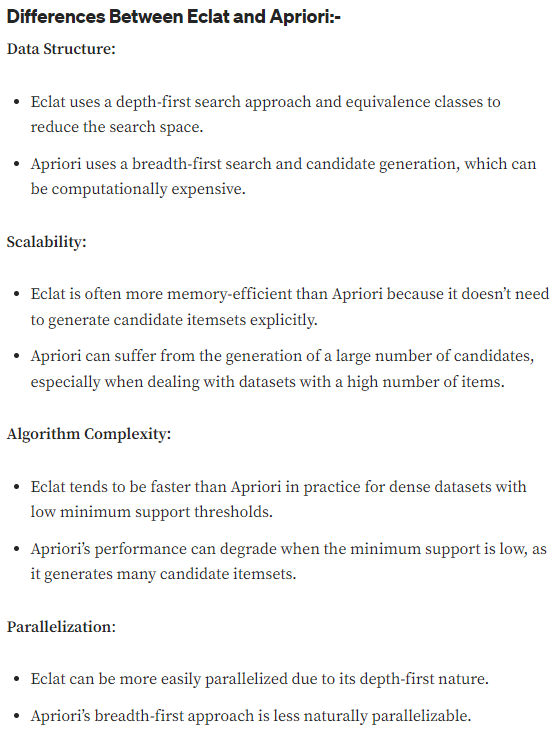
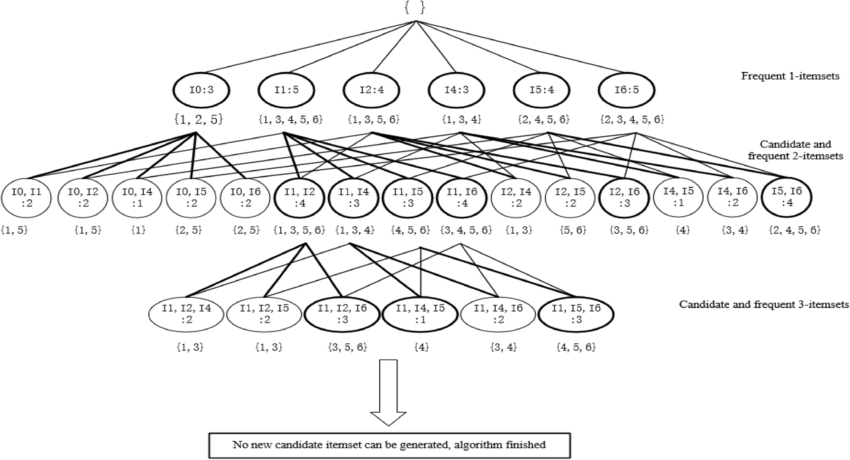
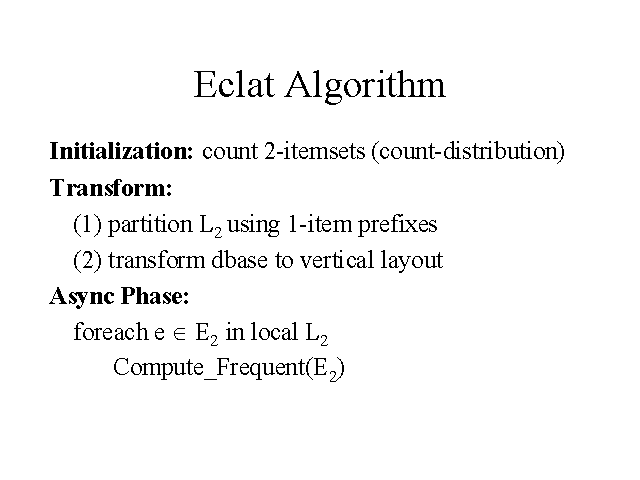
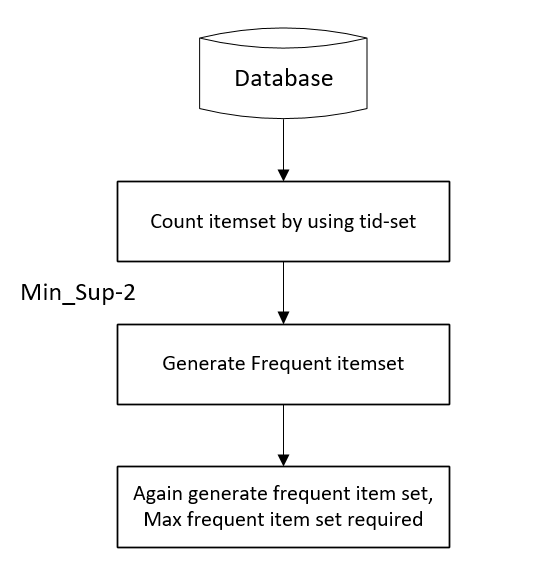
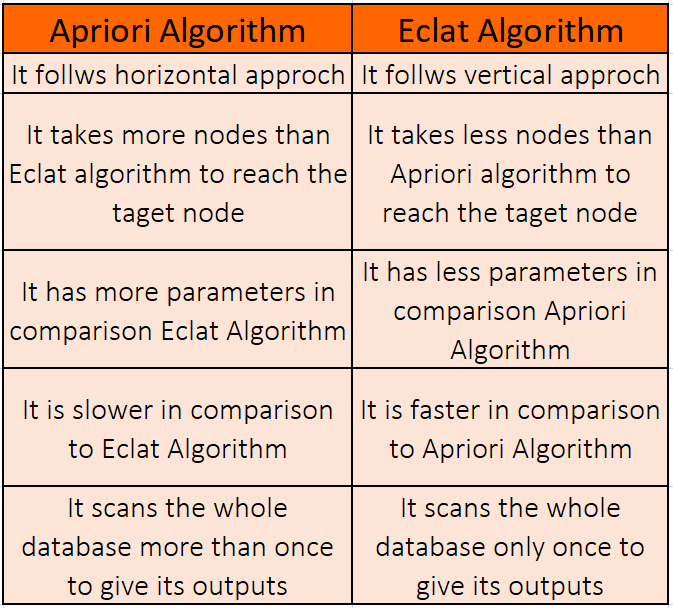
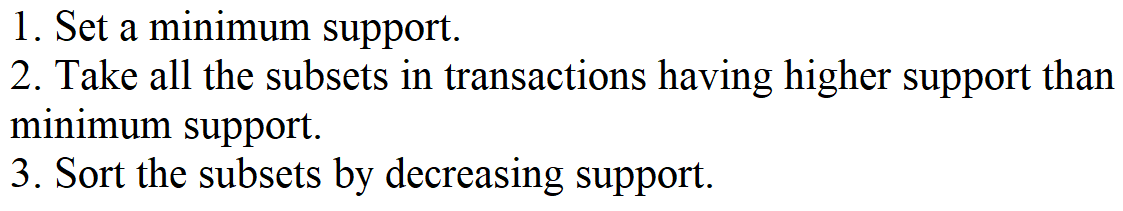
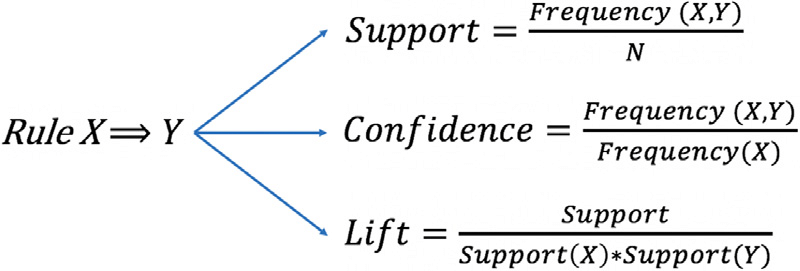
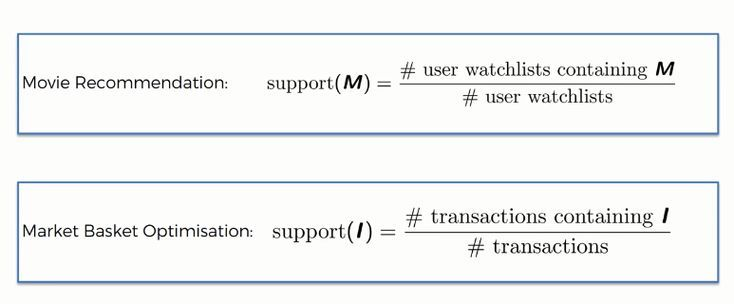

### <b>Data preprocessing</b>

In [32]:
import pandas as pd
from apyori import apriori

In [33]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header = None)
number_of_products = len(dataset.columns)
number_of_transactions = len(dataset)

print(f"1. Number of products: {number_of_products}\n")
print(f"2. Number of transactions: {number_of_transactions}\n")
print(f"3. Dataset: \n{dataset}\n")

1. Number of products: 20

2. Number of transactions: 7501

3. Dataset: 
                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6         

In [34]:
transactions = []
for i in range(0, number_of_transactions):
    transactions.append([str(dataset.values[i, j]) for j in range(0, number_of_products)])

### <b>Training Eclat model ~ Association rules</b>

In [35]:
rules = apriori(transactions = transactions,
                min_support = 0.003, min_confidence = 0.2, min_lift = 3,
                min_length = 2, max_length = 2)
results = list(rules)
print(f"Results: \n{results}\n")

Results: 
[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confi

### <b>Visualizing the results</b>

In [36]:
def create_report(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    data = list(zip(lhs, rhs, supports))
    column_names = ['Left Hand Side', 'Right Hand Side', 'Support']
    return pd.DataFrame(data, columns = column_names)

results_in_data_frame = create_report(results)
results_in_data_frame

,Left Hand Side,Right Hand Side,Support
0,light cream,chicken,0.004533
1,mushroom cream sauce,escalope,0.005733
2,pasta,escalope,0.005866
3,fromage blanc,honey,0.003333
4,herb & pepper,ground beef,0.015998
5,tomato sauce,ground beef,0.005333
6,light cream,olive oil,0.003200
7,whole wheat pasta,olive oil,0.007999
8,pasta,shrimp,0.005066


### <b>Displaying the results sorted by descending supports values</b>

In [37]:
results_in_data_frame.nlargest(n = 10, columns = 'Support')

,Left Hand Side,Right Hand Side,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
